In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
print("🌫🛸")

🌫🛸


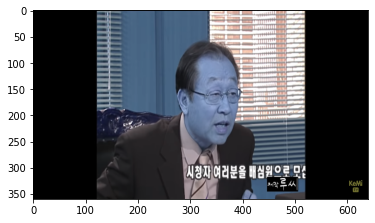

In [2]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/test3.PNG'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 360))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

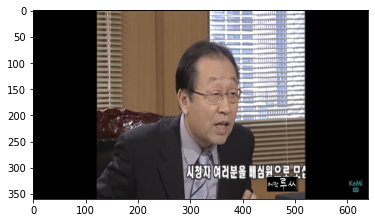

In [3]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [4]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
print("🌫🛸")

🌫🛸


In [5]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print("🌫🛸")

🌫🛸


In [6]:
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [7]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


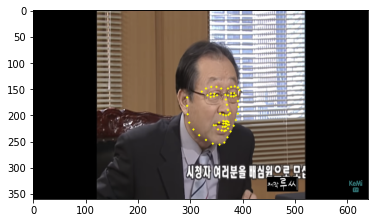

In [8]:
list_landmarks.pop()

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow
#img_show 기본 배경
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [9]:

#포문으로 딱히 돌릴 필요는없다. 30번점의 는 0 y 는 1 전체사각형의 넓이 dlib_rect.width()
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.height()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(372, 190)
(x,y) : (372,136)
(w,h) : (109,108)


In [10]:
#이미지 불러와서 노란박스 크기로 사이즈 매치함
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/king.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(108, 109, 3)


In [11]:
#스티커의 중앙점을 맞춤. 왼쪽위라서. 중점에서 위로 1 왼쪽으로 0.5감.
refined_x = x - w // 2  # left
refined_y = y - h       # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (318,28)


In [12]:
if refined_y < 0 :
    img_sticker = img_sticker[-refined_y:]
    print (img_sticker.shape)
    refined_y = 0
    print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

In [13]:
sticker_area = img_show[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]]
img_show[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)

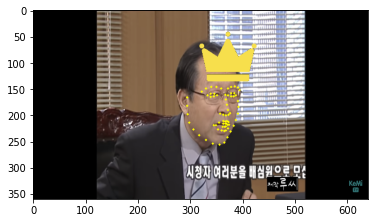

In [14]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

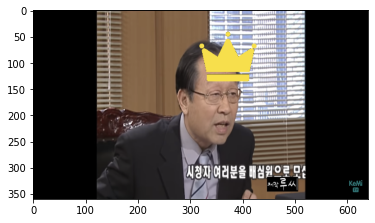

In [15]:
#여기서 원본 이미지를 건드림. 새로운 백버퍼를 만드는게 맞음

img_king = img_bgr.copy()
#img_king = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

sticker_area = img_king[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_king[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
#BGR이미지를 변환해서 출력됨.
plt.imshow(cv2.cvtColor(img_king, cv2.COLOR_BGR2RGB))
plt.show()

In [16]:
#포문으로 딱히 돌릴 필요는없다. 30번점의 는 0 y 는 1 전체사각형의 넓이 dlib_rect.width()
#이미지의 중심점. x y 를 구함.
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = landmark[30][0] - landmark[2][0]
    h = dlib_rect.height()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(372, 190)
(x,y) : (372,136)
(w,h) : (77,108)


In [17]:
#수염 이미지를 불러옴.
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/24674.png'
#img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.imread(sticker_path, cv2.IMREAD_COLOR)
img_sticker = cv2.resize(img_sticker, (w,h))



print (img_sticker.shape)

(108, 77, 3)


In [18]:
refined_x = x - w // 2  # left
refined_y = y       # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

if refined_y < 0 :
    img_sticker = img_sticker[-refined_y:]
    print (img_sticker.shape)
    refined_y = 0
    print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (334,136)


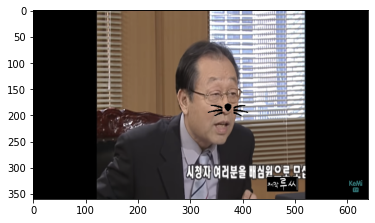

In [19]:
img_meow = img_bgr.copy()
sticker_area = img_meow[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_meow[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
#255 흰색 참이면이면 스티커영역이고 아니면  아니면 배경이미지다. 검은색부분만 출력됨.

plt.imshow(cv2.cvtColor(img_meow, cv2.COLOR_BGR2RGB))
plt.show()

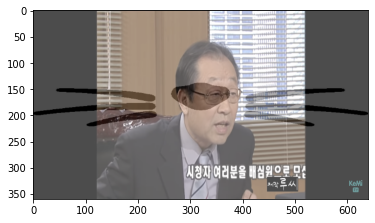

In [20]:
img_alpha = img_bgr.copy()
img_sticker = cv2.imread(sticker_path, cv2.IMREAD_COLOR)
img_sticker = cv2.resize(img_sticker, (640, 360))
dst = cv2.addWeighted(img_alpha, 0.7, img_sticker, 0.3, 0)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()